<a href="https://colab.research.google.com/github/MinahilSadiq1/Genetic_Algorithm_to_solve_Regression_Problems/blob/main/Genetic_Algorithm_CI_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Minahil Sadiq**

# **SP20-BCS-023**

## ASSIGNMENT 2

In [ ]:
#importing libraries
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading dataset
data_path = '/content/drive/MyDrive/Housing.csv'
data = pd.read_csv(data_path)

#showing records
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Preprocessing (handle missing values, encoding, etc.)
data = data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
data = data.fillna(data.mean())

# Convert categorical variables to one-hot encoding
data = pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

<ipython-input-16-a8694f8f610e>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [ ]:
# train test split wirth 80:20 ratio
target_column = 'price'
features = data.drop(target_column, axis=1)
target = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
#showing training records
X_train.tail(3)


,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
270,4500,3,2,3,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0
435,4040,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
102,5500,3,2,4,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0


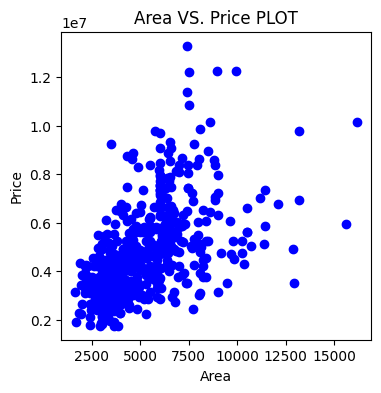

In [ ]:
#scatter plot
plt.figure(figsize=(4, 4))
plt.scatter(data['area'], data['price'], color='blue')
plt.title('Area VS. Price PLOT')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [ ]:
# Genetic Algorithm Initialization
population_size = 50
chromosome_length = len(X_train.columns)
num_generations = 100
mutation_rate = 0.1

In [ ]:
# Fitness function
def calculate_fitness(chromosome):
    selected_features = [feature for feature, gene in zip(X_train.columns, chromosome) if gene == 1]
    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)
    y_train_pred = model.predict(X_train[selected_features])
    y_test_pred = model.predict(X_test[selected_features])
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    return train_rmse, test_rmse

In [ ]:
# Genetic Algorithm Evaluation
population = [random.choices([0, 1], k=chromosome_length) for _ in range(population_size)]
best_individual = None
best_test_rmse = float('inf')

for generation in range(num_generations):
    # Calculate fitness for each individual
    fitness_scores = [calculate_fitness(individual) for individual in population]

    # Find the best individual in the population
    generation_best_index = np.argmin([score[1] for score in fitness_scores])
    generation_best_fitness = fitness_scores[generation_best_index][1]

    # Check if the best individual in this generation is better than the global best
    if generation_best_fitness < best_test_rmse:
        best_test_rmse = generation_best_fitness
        best_individual = population[generation_best_index]

    # Selection (Tournament selection)
    parents = []
    for _ in range(population_size):
        candidate_indices = random.choices(range(population_size), k=3)
        candidate_fitness = [fitness_scores[i] for i in candidate_indices]
        parents.append(population[candidate_indices[np.argmin([score[1] for score in candidate_fitness])]])

In [ ]:
# Crossover (Single-point crossover)
children = []
for i in range(0, population_size, 2):
    parent1 = parents[i]
    parent2 = parents[i + 1]
    crossover_point = random.randint(1, chromosome_length - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    children.extend([child1, child2])

In [ ]:
# Mutation
for i in range(population_size):
      for j in range(chromosome_length):
          if random.random() < mutation_rate:
              children[i][j] = 1 - children[i][j]

# Update population with the new generation
population = children

In [ ]:
# Print the best fitness in each generation
print(f"Generation {generation + 1} - Best Test RMSE: {best_test_rmse}")
print("Genetic Algorithm completed!")

Generation 100 - Best Test RMSE: 1319171.061904416
Genetic Algorithm completed!


In [ ]:
# Decode and evaluate the best individual
selected_features = [feature for feature, gene in zip(X_train.columns, best_individual) if gene == 1]
model = LinearRegression()
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
best_fitness = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# Print the best solution
print("Best Features chosen:", selected_features)
print("Fitness:", best_fitness)

Best Features chosen: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no', 'hotwaterheating_no', 'hotwaterheating_yes', 'airconditioning_no', 'prefarea_no', 'prefarea_yes', 'furnishingstatus_unfurnished']
Fitness: 1319171.061904416
